In [1]:
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv
import os
# import sklearn
from sklearn import svm
import numpy as np
import time
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
data_set_path = Path(f'{Path.cwd()}/brain_tumor_dataset')
# print(f"negative: {len(os.listdir(Path(data_set_path,'train','negative')))}, positive: {len(os.listdir(Path(data_set_path,'train','positive')))}")

In [3]:
number_of_positive_train_samples = len(os.listdir(Path(data_set_path,'train','positive')))
number_of_negative_train_samples = len(os.listdir(Path(data_set_path,'train','negative')))

number_of_positive_validation_samples = len(os.listdir(Path(data_set_path,'validation','positive')))
number_of_negative_validation_samples = len(os.listdir(Path(data_set_path,'validation','negative')))

number_of_positive_test_samples = len(os.listdir(Path(data_set_path,'test','positive')))
number_of_negative_test_samples = len(os.listdir(Path(data_set_path,'test','negative')))

print(f"Positive train: {number_of_positive_train_samples}, Negative train: {number_of_negative_train_samples}")
print(f"Positive validation: {number_of_positive_validation_samples}, Negative validation: {number_of_negative_validation_samples}")
print(f"Positive test: {number_of_positive_test_samples}, Negative test: {number_of_negative_test_samples}")

Positive train: 109, Negative train: 68
Positive validation: 15, Negative validation: 11
Positive test: 31, Negative test: 19


In [4]:
positive_train_target = np.ones(number_of_positive_train_samples)
negative_train_target = np.zeros(number_of_negative_train_samples)

positive_validation_target = np.ones(number_of_positive_validation_samples)
negative_validation_target = np.zeros(number_of_negative_validation_samples)

positive_test_target = np.ones(number_of_positive_test_samples)
negative_test_target = np.zeros(number_of_negative_test_samples)


In [5]:
print(len(positive_train_target), len(negative_train_target))
# print(len(positive_train_target), len(negative_train_target))

109 68


In [6]:
def prepare_img_dataset(sub_dir:str='train', class_sub_dir='positive'):
    start = time.perf_counter()
    img_list = []
    file_list = os.listdir(Path(data_set_path, sub_dir, class_sub_dir))
    for img in file_list:
        img_path = str(Path(data_set_path, sub_dir, class_sub_dir, img))
        #read image in grayscale
        read_file = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
        #resize image
        read_file = cv.resize(read_file, (300, 300), cv.INTER_CUBIC)

        img_list.append(read_file)
    end = time.perf_counter()
    print(f"time taken: {end - start}")
    return img_list

train_positive = prepare_img_dataset()
train_negative = prepare_img_dataset(sub_dir='train', class_sub_dir='negative')
validation_negative = prepare_img_dataset(sub_dir='validation', class_sub_dir='negative')
validation_positive = prepare_img_dataset(sub_dir='validation', class_sub_dir='positive')
test_positive = prepare_img_dataset(sub_dir='test', class_sub_dir='positive')
test_negative = prepare_img_dataset(sub_dir='test', class_sub_dir='negative')


time taken: 0.15053149999585003
time taken: 0.08341949999157805
time taken: 0.010050800003227778
time taken: 0.022467400005552918
time taken: 0.030847299989545718
time taken: 0.024979499998153187


In [7]:
print(len(train_positive),len(train_negative))
print(len(positive_train_target)+len(negative_train_target))


109 68
177


In [8]:
assert len(train_positive) == number_of_positive_train_samples,'not equal number_of_negative_test_samples lenghts'

In [9]:
train_x = np.concatenate((train_positive,train_negative))
train_y = np.concatenate((positive_train_target,negative_train_target))
train_x, train_y = shuffle(train_x, train_y)

In [10]:
val_x = np.concatenate((validation_positive,validation_negative))
val_y = np.concatenate((positive_validation_target,negative_validation_target))
val_x, val_y = shuffle(val_x, val_y)

In [11]:
#reshaping the baseline training dataset
train_x= train_x.reshape((len(train_x), train_x[0].shape[0]*train_x[0].shape[1]))
train_x.shape

(177, 90000)

In [12]:
#reshaping the baseline validation dataset
val_x= val_x.reshape((len(val_x), val_x[0].shape[0]*val_x[0].shape[1]))
val_x.shape

(26, 90000)

Developing Baseline Prediction Model 

In [13]:
# classifier = svm.SVC(gamma=0.001)
classifier = svm.SVC()
classifier.fit(train_x, train_y)

SVC()

In [14]:
predicted = classifier.predict(val_x)

In [15]:
print(
    f"Classification report for classifier {classifier}:\n"
    f"{metrics.classification_report(val_y, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

         0.0       0.57      0.36      0.44        11
         1.0       0.63      0.80      0.71        15

    accuracy                           0.62        26
   macro avg       0.60      0.58      0.58        26
weighted avg       0.61      0.62      0.60        26




Confusion matrix:
[[ 4  7]
 [ 3 12]]


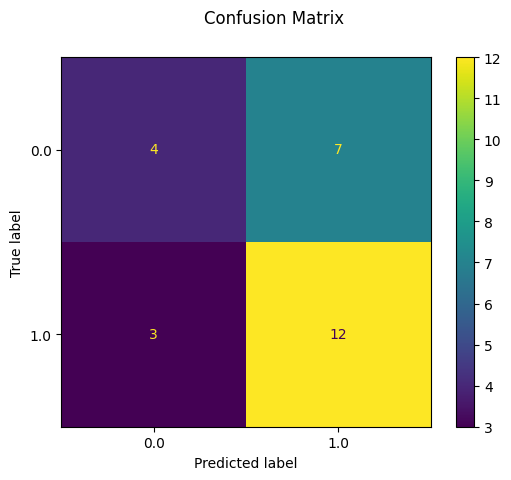

In [17]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(val_y, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [18]:
acc_score = accuracy_score(val_y, predicted)
auc_score = roc_auc_score(val_y, predicted)
print(
    f"Our baseline accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
)

Our baseline accuracy on the validation set is 0.6154 and AUC is 0.5818


In [53]:
def img_from_dir_pipeline(dataPath):
    return tf.keras.utils.image_dataset_from_directory(
        data_set_path/dataPath,
        image_size = (300, 300 ),
        batch_size = 15
    )

train_dataset = img_from_dir_pipeline(Path(f'{data_set_path}/train'))
test_dataset = img_from_dir_pipeline(Path(f'{data_set_path}/test'))
validation_dataset = img_from_dir_pipeline(Path(f'{data_set_path}/validation'))

Found 177 files belonging to 2 classes.
Found 50 files belonging to 2 classes.
Found 26 files belonging to 2 classes.


In [44]:
data_augmentation = tf.keras.Sequential(
 [
 tf.keras.layers.RandomFlip("horizontal", "veritcal"),
 tf.keras.layers.RandomRotation(0.5),
 tf.keras.layers.RandomZoom(0.2),
 ]
)

In [49]:
# train_positive[0].shape[0]


In [54]:
def build_model():
    input_layer = tf.keras.layers.Input(shape=(300,300,3))
    # augmentedData = data_augmentation(input_layer)
    # rescaleInputs = tf.keras.layers.Rescaling(1./255)(augmentedData)
    convLayer = tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu')(input_layer)
    # convLayer = tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu')(rescaleInputs)
    maxPoolLayer = tf.keras.layers.MaxPool2D(pool_size=4)(convLayer)
    convLayer = tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu')(maxPoolLayer)
    maxPoolLayer = tf.keras.layers.MaxPool2D(pool_size=4)(convLayer)
    convLayer = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(maxPoolLayer)
    maxPoolLayer = tf.keras.layers.MaxPool2D(pool_size=4)(convLayer)
    convLayer = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(maxPoolLayer)
    # maxPoolLayer = tf.keras.layers.MaxPool2D(pool_size=2)(convLayer)
    # convLayer = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(maxPoolLayer)
    flattenedLayer = tf.keras.layers.Flatten()(convLayer)
    outputLayer = tf.keras.layers.Dense(1, activation='sigmoid')(flattenedLayer)
    return tf.keras.Model(inputs=input_layer, outputs=outputLayer)
    

In [55]:
model  = build_model()
# compiling the model
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640  

In [24]:
%load_ext tensorboard

%tensorboard --logdir tensorboard_log_dir

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [25]:
tensorboard_log_dir = Path(data_set_path,'logs')
callback_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath= 'brain_cancer-model_4.keras',
        monitor= 'val_loss',
        save_only_best= True
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir=tensorboard_log_dir, 
        histogram_freq=1,
        update_freq='epoch',
    )
]

history = model.fit(
    train_dataset, 
    validation_data = validation_dataset,
    epochs=20,
    # learning_rate=0.001,
    callbacks= callback_list
)

Epoch 1/20
12/12 [==============================] - 3s 211ms/step - loss: 5.3412 - accuracy: 0.6215 - val_loss: 1.4197 - val_accuracy: 0.6154
Epoch 2/20
12/12 [==============================] - 2s 189ms/step - loss: 0.8689 - accuracy: 0.7684 - val_loss: 1.4229 - val_accuracy: 0.5769
Epoch 3/20
12/12 [==============================] - 2s 179ms/step - loss: 0.6972 - accuracy: 0.7853 - val_loss: 0.9752 - val_accuracy: 0.7308
Epoch 4/20
12/12 [==============================] - 2s 182ms/step - loss: 0.4787 - accuracy: 0.8136 - val_loss: 1.1709 - val_accuracy: 0.6538
Epoch 5/20
12/12 [==============================] - 2s 196ms/step - loss: 0.3743 - accuracy: 0.8418 - val_loss: 0.7946 - val_accuracy: 0.7308
Epoch 6/20
12/12 [==============================] - 3s 275ms/step - loss: 0.2826 - accuracy: 0.8983 - val_loss: 0.9960 - val_accuracy: 0.7308
Epoch 7/20
12/12 [==============================] - 3s 276ms/step - loss: 0.1839 - accuracy: 0.9379 - val_loss: 0.8747 - val_accuracy: 0.7308
Epoch 

In [26]:
model.predict(test_dataset)

4/4 [==============================] - 0s 51ms/step


array([[5.8836651e-01],
       [2.8876922e-01],
       [9.8901415e-01],
       [9.9990922e-01],
       [9.9991900e-01],
       [9.9999988e-01],
       [3.9284188e-02],
       [7.1895724e-06],
       [9.9946445e-01],
       [9.9999678e-01],
       [8.8117534e-01],
       [1.0000000e+00],
       [9.8800206e-01],
       [9.8335713e-01],
       [9.0992486e-01],
       [4.8582866e-03],
       [9.5553935e-01],
       [5.1116824e-01],
       [9.9901319e-01],
       [8.1361161e-04],
       [7.2096854e-01],
       [9.9960649e-01],
       [5.3420339e-02],
       [3.8418722e-05],
       [9.9762607e-01],
       [3.2378633e-05],
       [5.9938663e-01],
       [1.4708539e-03],
       [9.9890620e-01],
       [9.9362004e-01],
       [9.9431312e-01],
       [8.8117534e-01],
       [1.9128505e-03],
       [8.7173128e-01],
       [9.9982029e-01],
       [2.0550755e-04],
       [8.2798737e-01],
       [7.2814066e-09],
       [6.4985051e-07],
       [9.9934238e-01],
       [2.1999197e-04],
       [9.999859

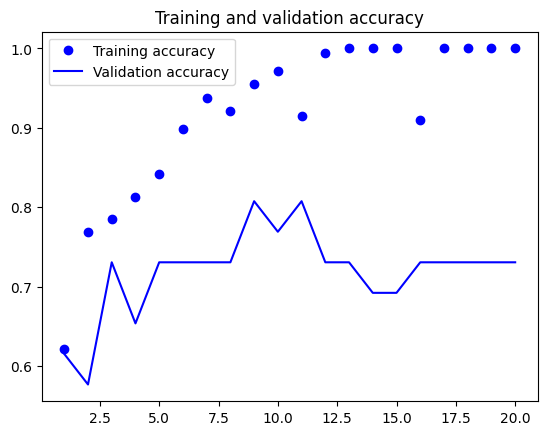

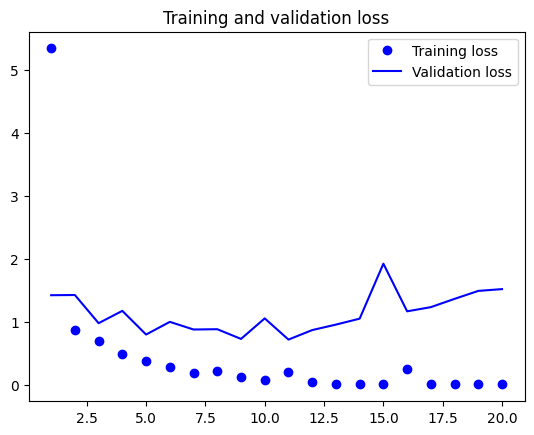

In [28]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [56]:
imgPath = str(Path(data_set_path,'train','positive','Y1.jpg'))
read_img = cv.imread(imgPath)
read_img = cv.resize(read_img, (300, 300), cv.INTER_CUBIC)
print(read_img.dtype)
print(read_img.shape)
print('loading model')
model_loaded = tf.keras.models.load_model(Path(Path.cwd(),"brain_cancer-model.keras"))
print('model loaded')
model_loaded.predict(read_img)

uint8
(300, 300, 3)
loading model
model loaded


ValueError: in user code:

    File "C:\Users\senanuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\senanuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\senanuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\senanuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\senanuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\senanuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 300, 300, 3), found shape=(None, 300, 3)
